In [1]:
#!pip install simple_fpa

In [2]:
# %%capture out
# ! cd ..; pip install . --use-feature=in-tree-build

In [3]:
%%capture out
! cd ..; pip install .

In [4]:
print((out.stdout.split('\n')[-2]))

In [5]:
from simple_fpa import Model
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pylab import rcParams

rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Arial"],
})

rcParams['figure.dpi'] = 200

In [6]:
df = pd.read_csv('../_data/haile_data_prepared.csv', index_col=0)

In [7]:
model = Model(data = df, auctionid_columns = ['auctionid'], bid_column = 'actual_bid')
cont_covs = ['adv_value', 'hhi', 'volume_total_1']
disc_covs = ['year', 'forest']
model.residualize(cont_covs, disc_covs, 'multiplicative')

In [8]:
model.summary()

                            OLS Regression Results                            
Dep. Variable:     np.log(actual_bid)   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 1.495e+04
Date:                Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                        10:48:07   Log-Likelihood:                -37633.
No. Observations:               60758   AIC:                         7.536e+04
Df Residuals:                   60711   BIC:                         7.578e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2

In [9]:
# # we can simulate artificial data, of course
# model.data._resid = np.sort(np.random.uniform(0,1,size = len(model.data)))

In [22]:
model.trim_residuals(10)
model.fit(smoothing_rate = 0.2, trim_percent = 5, reflect = True)
model.predict()

In [23]:
model.make_ci(99)

In [24]:
model.make_cb(99, draws = 1000)

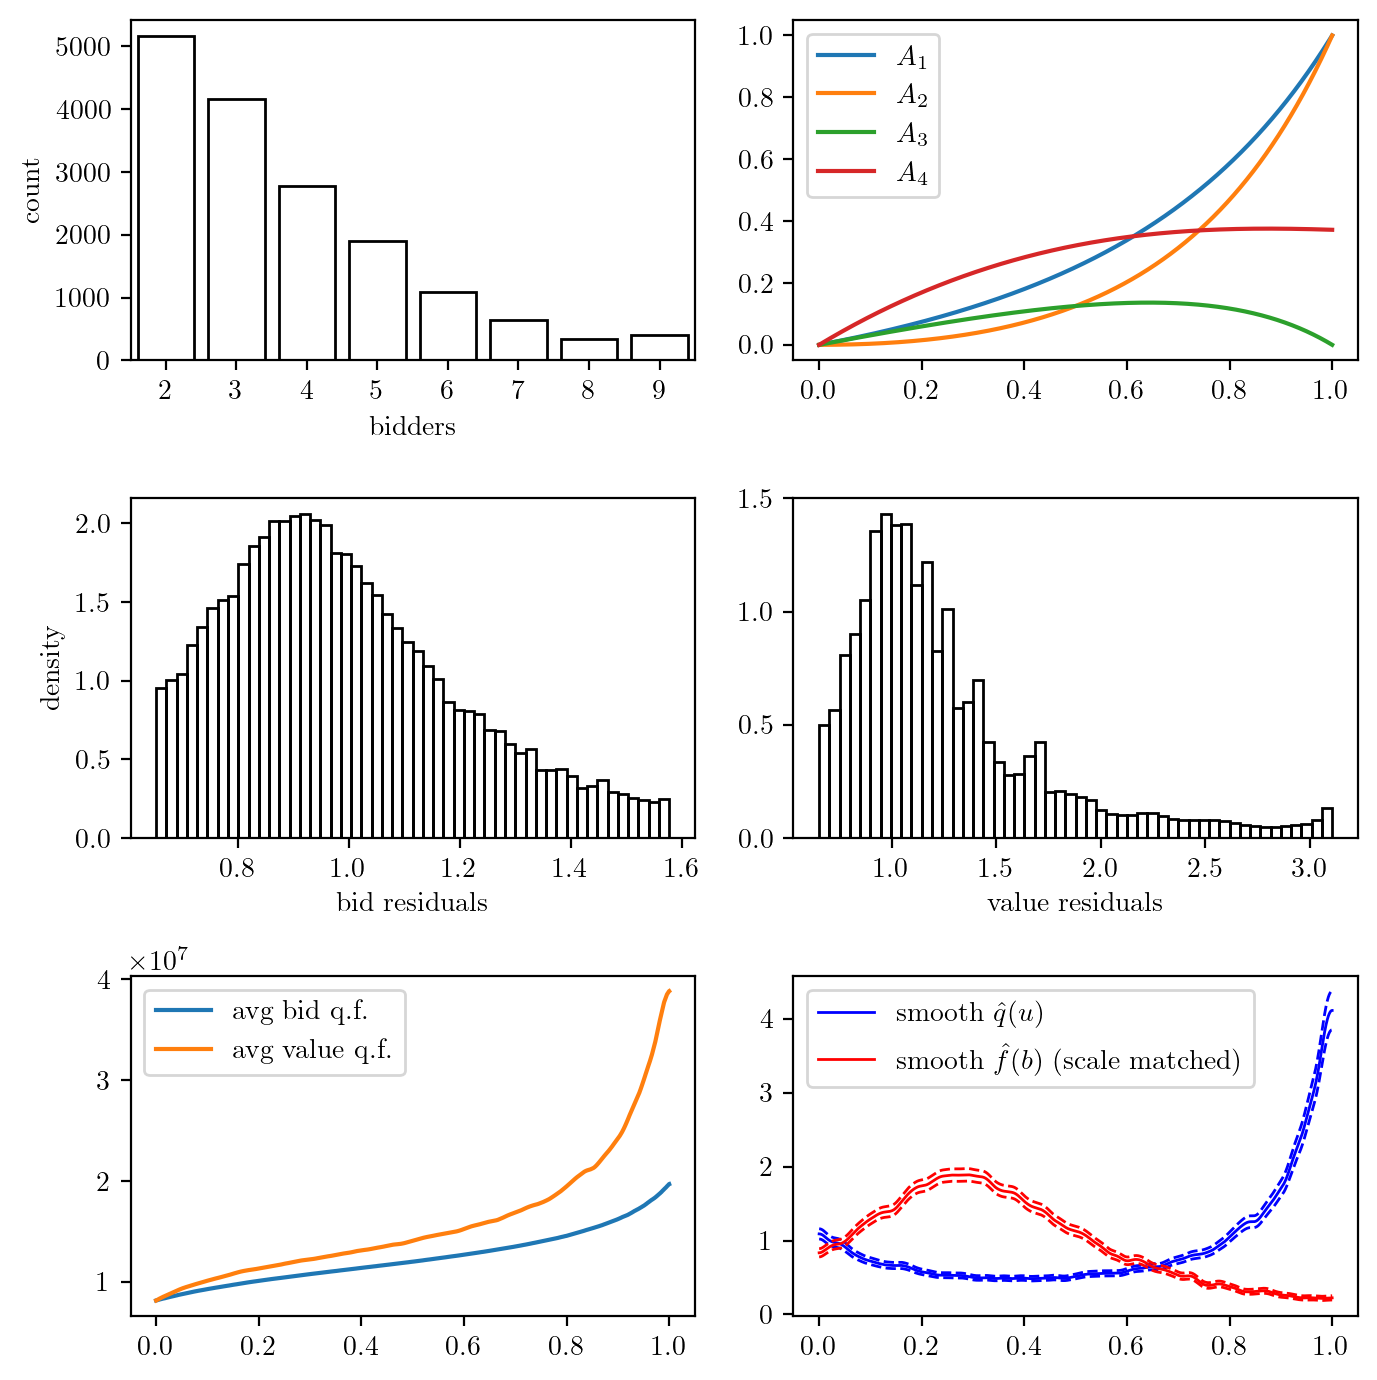

In [25]:
model.plot_stats()

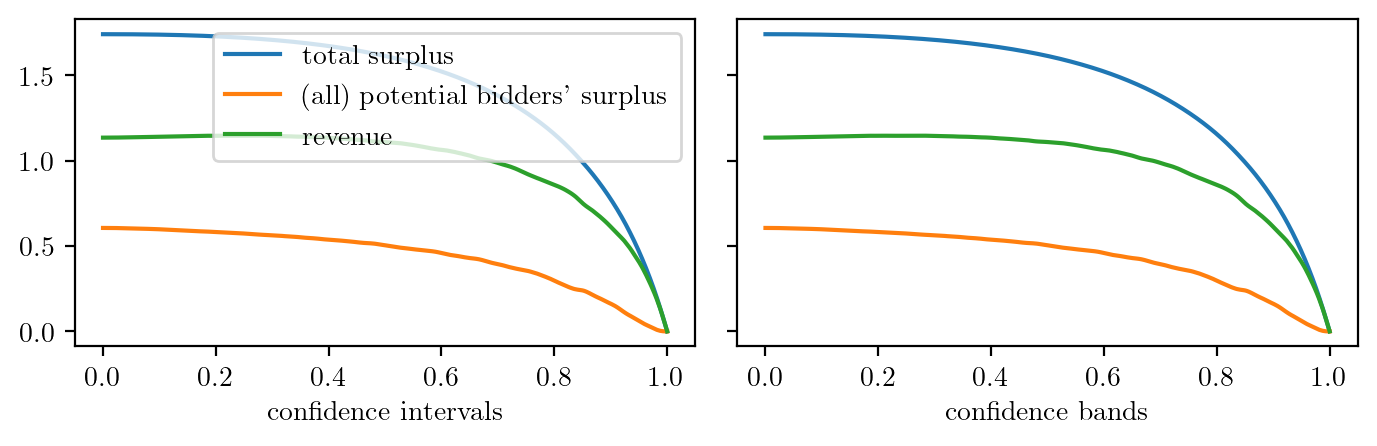

In [26]:
model.plot_counterfactuals()

In [27]:
model.data.sample(5)

,auctionid,hhi,forest,adv_value,year,state,volume_total_1,actual_bid,_bidders,_resid,_fitted,_trimmed,_u,_hat_q,_hat_v,_latent_resid,_ts,_bs,_rev,_latent_actual_bid
26119,9650,0.186230,4,3274604.0,78,16,866.0,5474363.0,2,1.049841,5.214470e+06,0,0.653966,0.646229,1.281639,1.281639,1.453281,0.047551,1.025318,6.683066e+06
27790,11321,0.415638,3,21857404.0,89,13,1353.0,21966840.0,3,0.917372,2.394539e+07,0,0.411809,0.484692,1.056996,1.056996,1.665510,0.059403,1.130880,2.531019e+07
42777,14359,0.638208,11,308200.0,87,6,479.0,895251.0,7,1.266076,7.071069e+05,0,0.879601,1.497132,1.828365,1.828365,0.870776,0.021658,0.675849,1.292849e+06
58523,3029,0.512857,9,19497624.0,81,5,1042.0,26315833.0,7,1.114040,2.362197e+07,0,0.742269,0.815595,1.415782,1.415782,1.298031,0.040189,0.936328,3.344356e+07
51026,15572,0.505581,10,3621539.0,79,6,701.0,4689970.0,5,0.822361,5.703056e+06,0,0.223619,0.543217,0.923146,0.923146,1.724040,0.064279,1.145532,5.264753e+06
